In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import FONN1, FONN2, TREENN1, TREENN2

In [ ]:
# Load the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,
                     header=None)  # type: ignore
X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5], X.shape, y[:5], y.shape

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_215984/2428878050.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,


In [17]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], X_train.shape, X_test[:5], X_test.shape, y_train[:5], y_train.shape, y_test[:5], y_test.shape

(array([[1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
         5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
         3.49480e+02, 2.49100e+01],
        [6.27390e-01, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
         5.83400e+00, 5.65000e+01, 4.49860e+00, 4.00000e+00, 3.07000e+02,
         3.95620e+02, 8.47000e+00],
        [3.46600e-02, 3.50000e+01, 6.06000e+00, 0.00000e+00, 4.37900e-01,
         6.03100e+00, 2.33000e+01, 6.64070e+00, 1.00000e+00, 3.04000e+02,
         3.62250e+02, 7.83000e+00],
        [7.05042e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
         6.10300e+00, 8.51000e+01, 2.02180e+00, 2.40000e+01, 6.66000e+02,
         2.52000e+00, 2.32900e+01],
        [7.25800e-01, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
         5.72700e+00, 6.95000e+01, 3.79650e+00, 4.00000e+00, 3.07000e+02,
         3.90950e+02, 1.12800e+01]]),
 (404, 12),
 array([[9.17800e-02, 0.00000e+00, 4.05000e+00, 0.00000e+00, 5.100

In [18]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end_time = time.time()

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    comp_time = end_time - start_time

    return r2, mae, mse, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    # "Lasso Regression": Lasso(),
    # "ElasticNet Regression": ElasticNet(),
    # "Bayesian Ridge Regression": BayesianRidge(),
    # "ARD Regression": ARDRegression(),
    # "SGD Regressor": SGDRegressor(),
    # "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    # "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    # "XGBoost Regressor": XGBRegressor(random_state=42),
    # "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    # "Bagging Regressor": BaggingRegressor(random_state=42),
    # "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    # "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    # "Stacking Regressor": StackingRegressor(estimators=[
    #     ('lr', LinearRegression()),
    #     ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    # ], final_estimator=Ridge()),
    # "Voting Regressor": VotingRegressor(estimators=[
    #     ('lr', LinearRegression()),
    #     ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    #     ('gb', GradientBoostingRegressor(random_state=42))
    # ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, comp_time = train_evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse, "Time (s)": comp_time}

In [19]:
# Initialize and train FONN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Increased hidden layer size
output_dim = 1
num_trees_input = 10
epochs = 2000
learning_rate = 0.005

fonn1 = FONN1(input_dim, hidden_dim, output_dim, num_trees_input)
fonn1.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 604.7744384773599
Epoch 100, Loss: 384.38971450625536
Epoch 200, Loss: 224.90442298493787
Epoch 300, Loss: 125.91907879183279
Epoch 400, Loss: 76.53381527536916
Epoch 500, Loss: 69.0477084792826
Epoch 600, Loss: 67.37719413450968
Epoch 700, Loss: 66.04746218248327
Epoch 800, Loss: 65.32316139309594
Epoch 900, Loss: 65.1096721305803
Epoch 1000, Loss: 52.71829802396601
Epoch 1100, Loss: 76.23601502575738
Epoch 1200, Loss: 72.99655956744643
Epoch 1300, Loss: 70.854620920668
Epoch 1400, Loss: 68.94951172237266
Epoch 1500, Loss: 66.33719653431702
Epoch 1600, Loss: 70.98408100428759
Epoch 1700, Loss: 58.72722618414035
Epoch 1800, Loss: 56.87884848085226
Epoch 1900, Loss: 55.88410738641417


In [20]:
# Initialize and train FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.001

fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden)
fonn2.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 608.4181587128504
Epoch 100, Loss: 7.222309935054704
Epoch 200, Loss: 7.086796170951693
Epoch 300, Loss: 7.052862737284359
Epoch 400, Loss: 7.014893921847838
Epoch 500, Loss: 6.963338064286094
Epoch 600, Loss: 6.910318556777278
Epoch 700, Loss: 6.864994428139917
Epoch 800, Loss: 6.831761486677015
Epoch 900, Loss: 6.8016369924252835


In [21]:
# Initialize and train TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Hidden layer size
output_dim = 1
epochs = 2000
learning_rate = 0.005

# Initialize and train TREENN1
treenn1 = TREENN1(input_dim, hidden_dim, output_dim)
treenn1.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 605.8407888200546
Epoch 100, Loss: 384.904461665291
Epoch 200, Loss: 225.25510395628348
Epoch 300, Loss: 126.10577216205016
Epoch 400, Loss: 87.48864161597854
Epoch 500, Loss: 74.40282760669993
Epoch 600, Loss: 69.76348868882509
Epoch 700, Loss: 77.73358304662665
Epoch 800, Loss: 72.53642181796044
Epoch 900, Loss: 69.41331142675472
Epoch 1000, Loss: 67.09586236578798
Epoch 1100, Loss: 65.79383519018903
Epoch 1200, Loss: 65.33294763828412
Epoch 1300, Loss: 60.349816732603756
Epoch 1400, Loss: 48.59705336982349
Epoch 1500, Loss: 44.954086726486956
Epoch 1600, Loss: 40.42154562365632
Epoch 1700, Loss: 46.468504918277844
Epoch 1800, Loss: 102.72528056631407
Epoch 1900, Loss: 98.63876620891727


In [22]:
# Initialize and train TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
epochs = 1000
learning_rate = 0.001

treenn2 = TREENN2(input_dim, hidden_dim, output_dim)
treenn2.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 612.965404837784
Epoch 100, Loss: 453.3978151272157
Epoch 200, Loss: 319.25933927497096
Epoch 300, Loss: 209.56097309596095
Epoch 400, Loss: 124.30264323677731
Epoch 500, Loss: 63.48433161142804
Epoch 600, Loss: 27.10602787679134
Epoch 700, Loss: 14.702919157405208
Epoch 800, Loss: 10.688826772963793
Epoch 900, Loss: 8.74932368226841


In [23]:
# Measure computational time and evaluate the FONN1 model
start_time = time.time()
fonn1_predictions = fonn1.predict(X_test)
end_time = time.time()
fonn1_r2 = r2_score(y_test, fonn1_predictions)
fonn1_mae = mean_absolute_error(y_test, fonn1_predictions)
fonn1_mse = mean_squared_error(y_test, fonn1_predictions)
fonn1_time = end_time - start_time

results["FONN1"] = {"R² Score": fonn1_r2, "MAE": fonn1_mae, "MSE": fonn1_mse, "Time (s)": fonn1_time}

In [ ]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
fonn2_predictions = fonn2.predict(X_test)
end_time = time.time()
fonn2_r2 = r2_score(y_test, fonn2_predictions)
fonn2_mae = mean_absolute_error(y_test, fonn2_predictions)
fonn2_mse = mean_squared_error(y_test, fonn2_predictions)
fonn2_time = end_time - start_time

results["FONN2"] = {"R² Score": fonn2_r2, "MAE": fonn2_mae, "MSE": fonn2_mse, "Time (s)": fonn2_time}

# Measure computational time and predict house prices using the decision trees in the hidden layer
start_time = time.time()
tree_based_predictions = fonn2.tree_predict(X_test)
end_time = time.time()
tree_based_r2 = r2_score(y_test, tree_based_predictions)
tree_based_mae = mean_absolute_error(y_test, tree_based_predictions)
tree_based_mse = mean_squared_error(y_test, tree_based_predictions)
tree_based_time = end_time - start_time

results["Tree-based Predictions (FONN2)"] = {"R² Score": tree_based_r2, "MAE": tree_based_mae, "MSE": tree_based_mse, "Time (s)": tree_based_time}

# Combine 10 decision trees and evaluate the ensemble model
trees = [DecisionTreeRegressor(max_depth=5, random_state=i) for i in range(10)]

for tree in trees:
    tree.fit(X_train, y_train)

ensemble_predictions = np.mean([tree.predict(X_test) for tree in trees], axis=0)
ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_time = sum([train_evaluate_model(tree, X_train, X_test, y_train, y_test)[3] for tree in trees])

results["Ensemble of 10 Trees (FONN2)"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae, "MSE": ensemble_mse, "Time (s)": ensemble_time}

In [25]:
# Measure computational time and evaluate the TREENN1 model
start_time = time.time()
treenn1_predictions = treenn1.predict(X_test)
end_time = time.time()
treenn1_r2 = r2_score(y_test, treenn1_predictions)
treenn1_mae = mean_absolute_error(y_test, treenn1_predictions)
treenn1_mse = mean_squared_error(y_test, treenn1_predictions)
treenn1_time = end_time - start_time

results["TREENN1"] = {"R² Score": treenn1_r2, "MAE": treenn1_mae, "MSE": treenn1_mse, "Time (s)": treenn1_time}

In [ ]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
treenn2_predictions = treenn2.predict(X_test)
end_time = time.time()
treenn2_r2 = r2_score(y_test, treenn2_predictions)
treenn2_mae = mean_absolute_error(y_test, treenn2_predictions)
treenn2_mse = mean_squared_error(y_test, treenn2_predictions)
treenn2_time = end_time - start_time

results["TREENN2"] = {"R² Score": treenn2_r2, "MAE": treenn2_mae, "MSE": treenn2_mse, "Time (s)": treenn2_time}

# Measure computational time and predict house prices using the decision tree in the hidden layer
start_time = time.time()
tree_based_predictions = treenn2.tree_predict(X_test)
end_time = time.time()
tree_based_r2 = r2_score(y_test, tree_based_predictions)
tree_based_mae = mean_absolute_error(y_test, tree_based_predictions)
tree_based_mse = mean_squared_error(y_test, tree_based_predictions)
tree_based_time = end_time - start_time

results["Tree-based Predictions (TREENN2)"] = {"R² Score": tree_based_r2, "MAE": tree_based_mae, "MSE": tree_based_mse, "Time (s)": tree_based_time}

In [27]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,R² Score,MAE,MSE,Time (s)
Linear Regression,0.629049,3.530902,27.203240,0.003384
MLP Regressor,0.608074,3.391399,28.741430,0.234194
Random Forest Regressor,0.887049,2.106539,8.283131,0.276441
Gradient Boosting Regressor,0.917156,1.901438,6.075283,0.104504
FONN1,0.374360,4.256389,45.880537,0.001842
FONN2,0.836451,2.440114,11.993646,0.003200
Tree-based Predictions (FONN2),0.833933,2.456882,12.178347,0.002156
Ensemble of 10 Trees (FONN2),0.833933,2.456882,12.178347,0.018155
TREENN1,-0.395435,9.133208,102.332498,0.001170
TREENN2,0.766287,2.592914,17.139076,0.001395


Tree 0 feature importances:
[4.68668186e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.73499974e-03 6.29222250e-01 6.17612617e-03 7.27222195e-02
 0.00000000e+00 1.66970863e-02 5.42729365e-04 2.16019204e-01]
Tree 0 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.11
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature

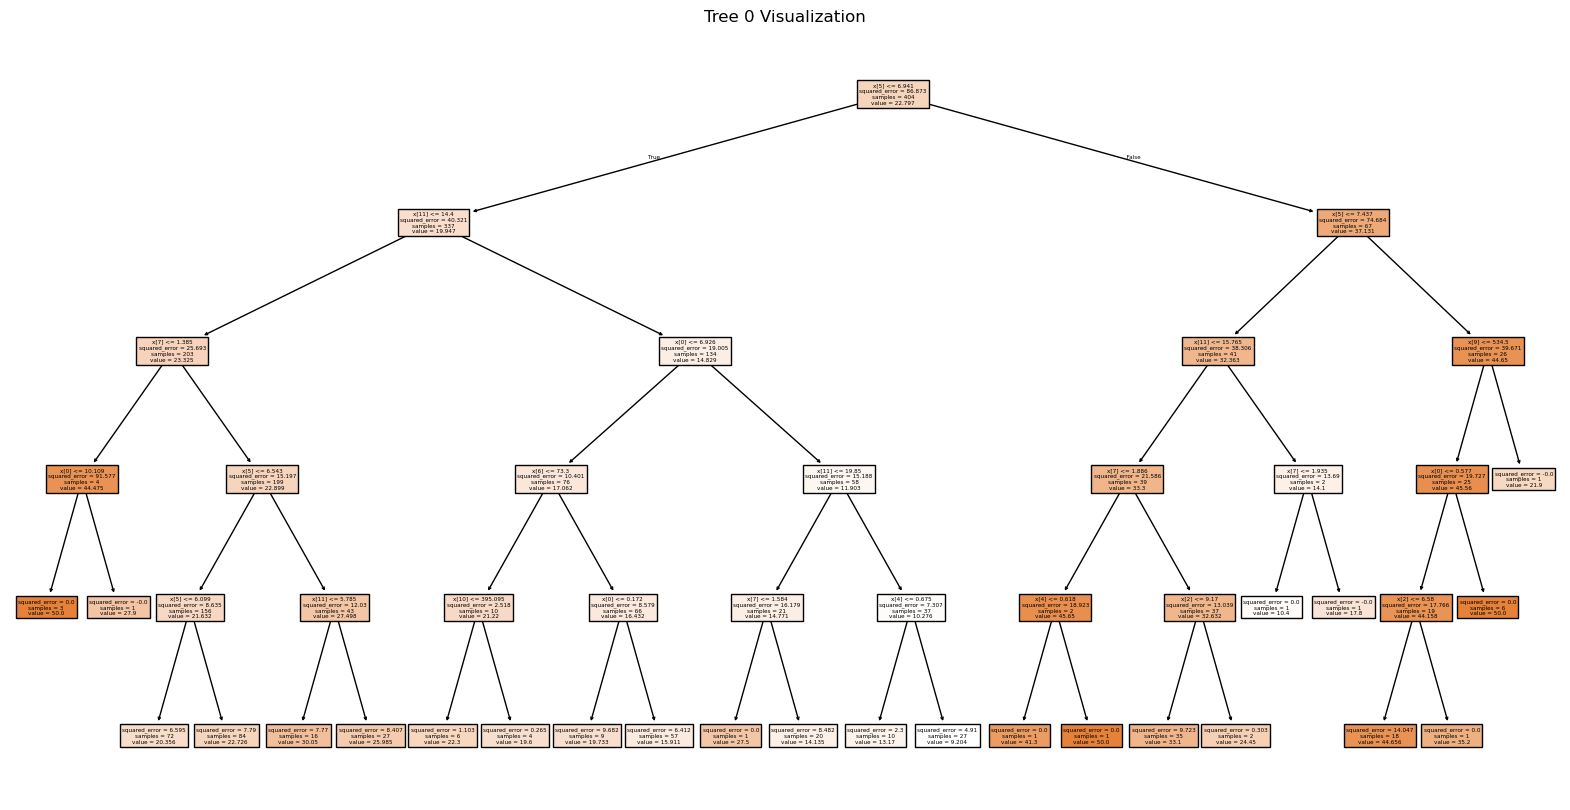

Tree 1 feature importances:
[5.22009741e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.41037338e-03 6.29222250e-01 6.17612617e-03 7.18728865e-02
 0.00000000e+00 1.17395935e-03 5.42729365e-04 2.27382135e-01]
Tree 1 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_11 <= 10.51
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  10.51
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- featu

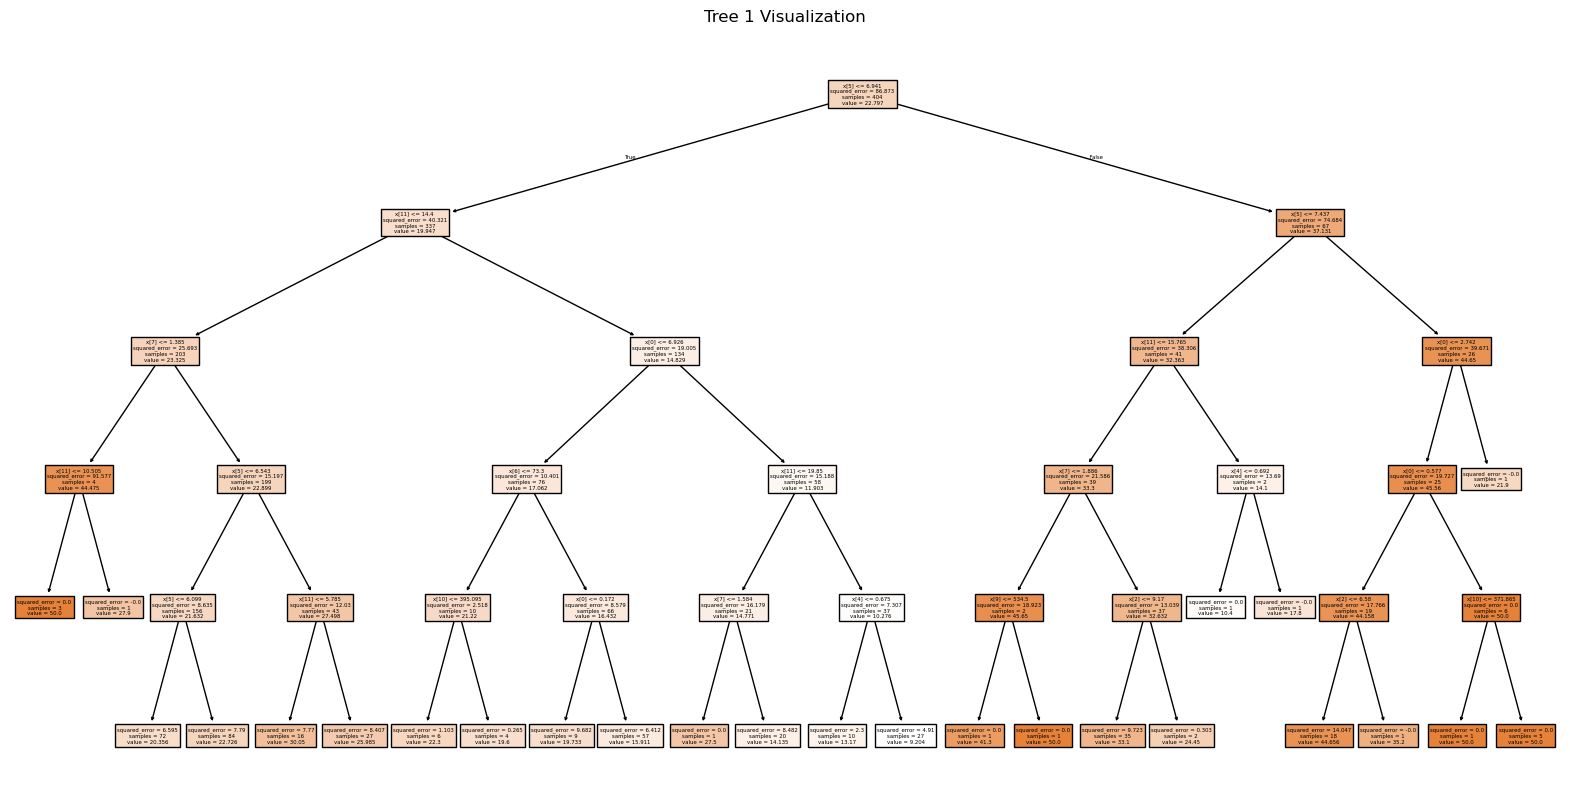

Tree 2 feature importances:
[0.08531884 0.         0.00701857 0.         0.00356104 0.63449932
 0.00702546 0.06659581 0.         0.         0.00171669 0.19426427]
Tree 2 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.11
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature_10 <= 395.10
|   |   |   |   |   |--- value: [22

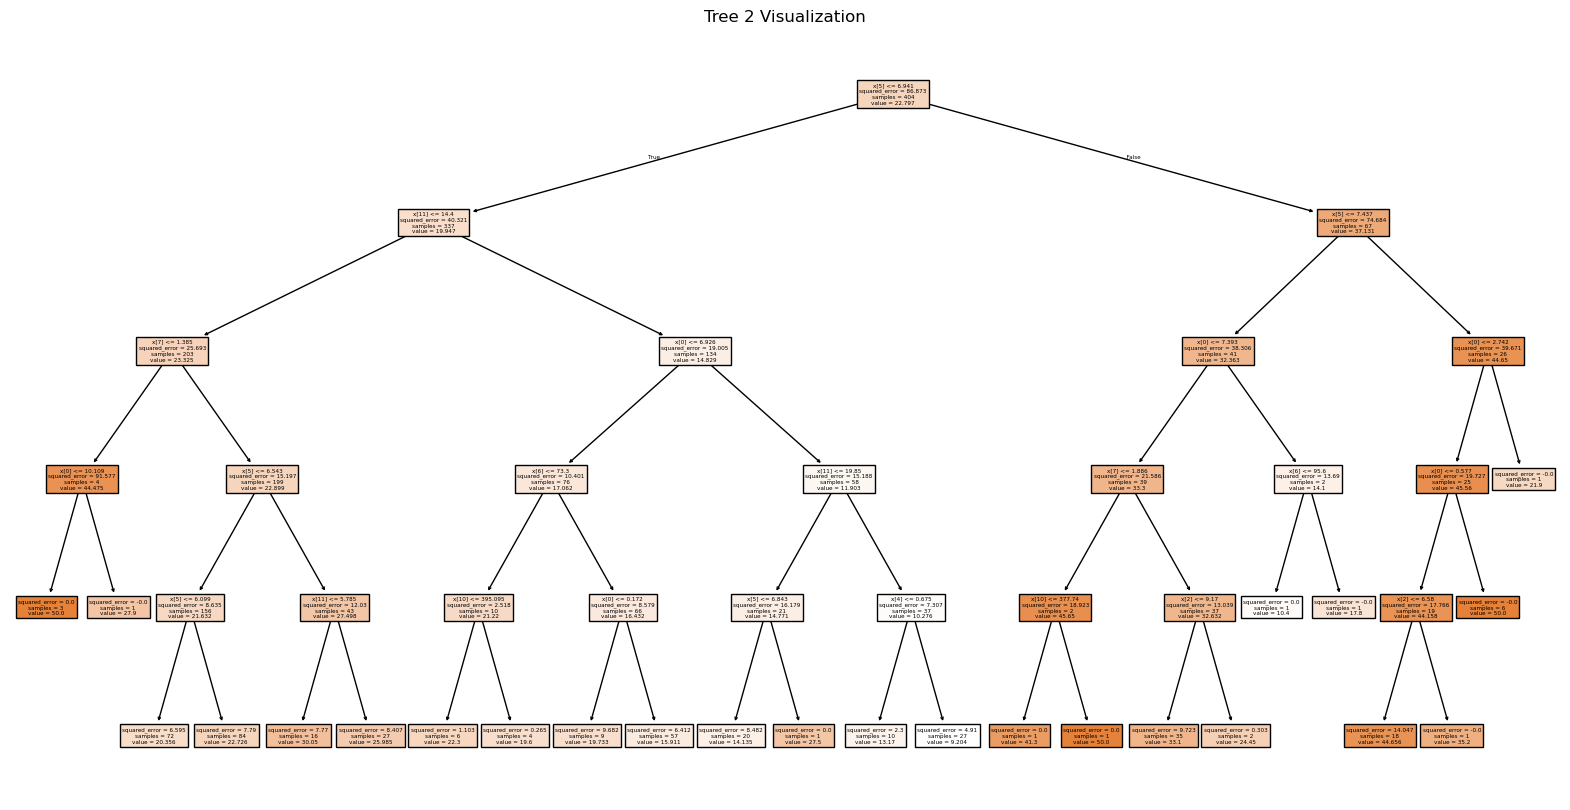

Tree 3 feature importances:
[7.39559073e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.41037338e-03 6.34499324e-01 6.17612617e-03 6.77697719e-02
 0.00000000e+00 0.00000000e+00 5.42729365e-04 2.05627202e-01]
Tree 3 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_11 <= 10.51
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  10.51
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- featu

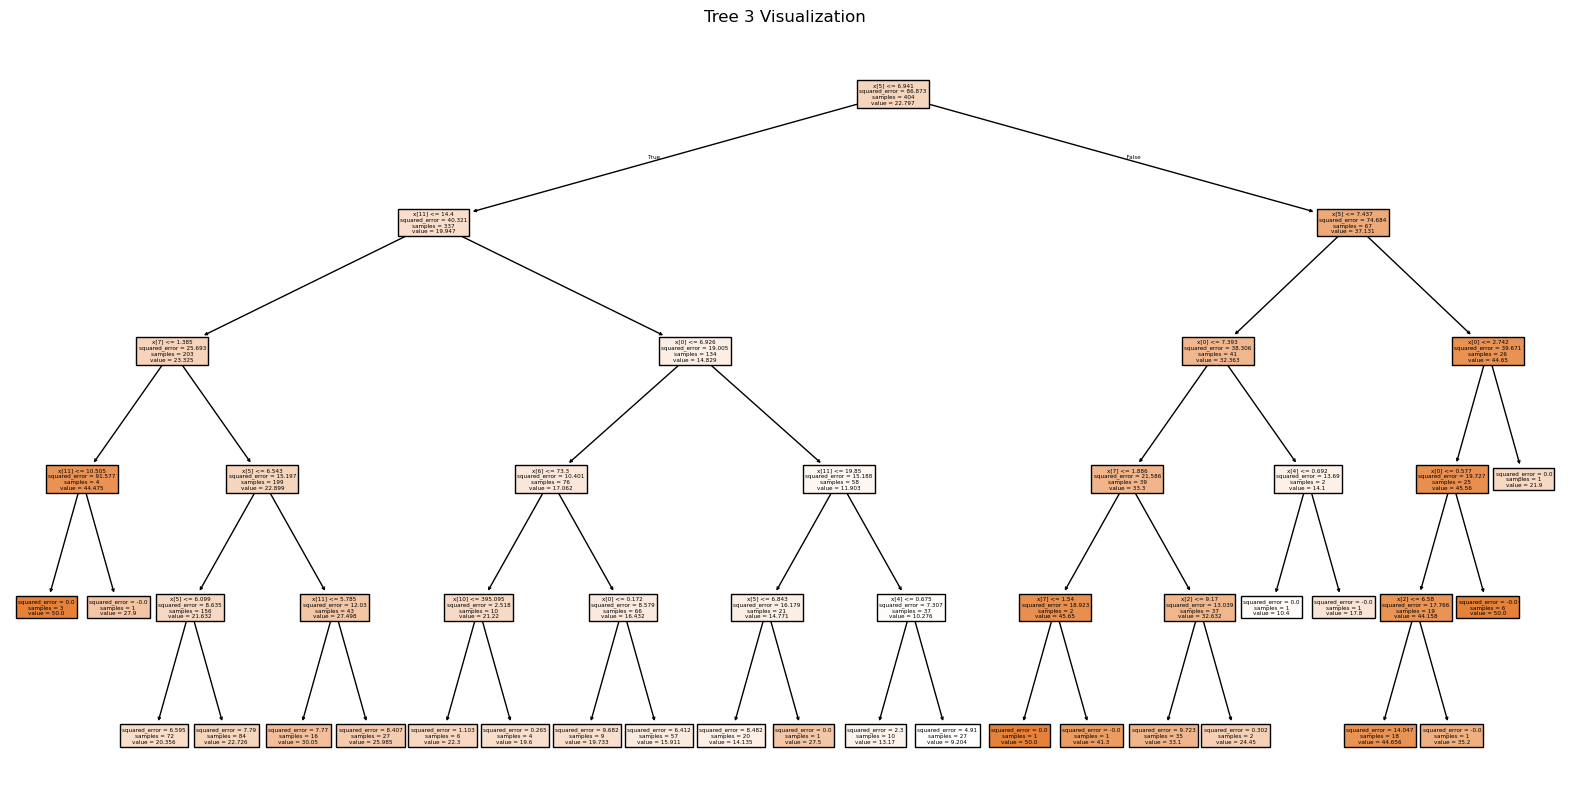

Tree 4 feature importances:
[0.05220097 0.         0.00701857 0.         0.004735   0.63007158
 0.00617613 0.07187289 0.         0.         0.01190566 0.2160192 ]
Tree 4 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_10 <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature_10 <= 395.10
|   |   |   |   |   |--- value:

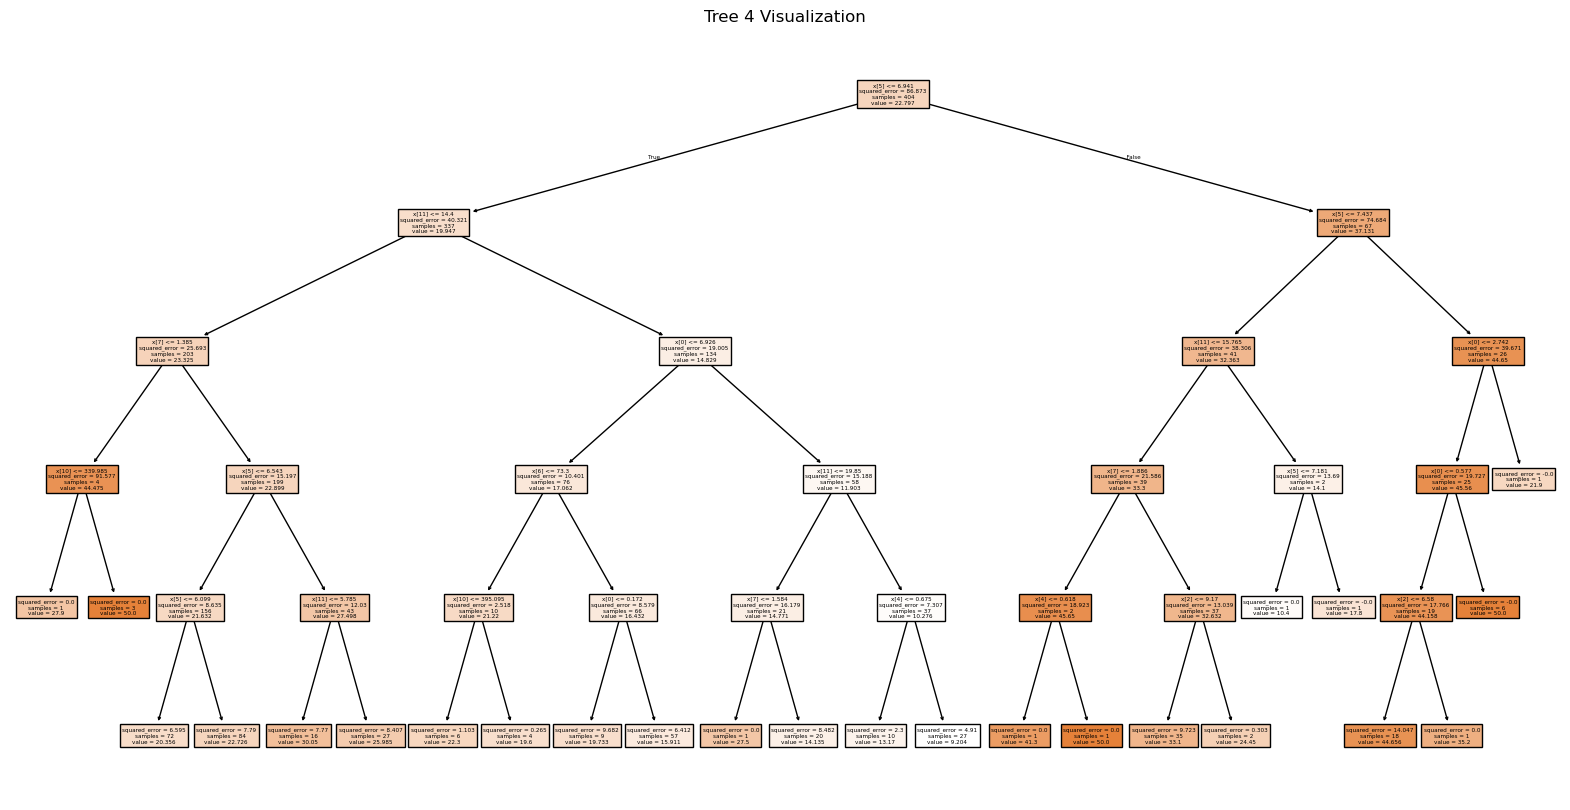

Tree 5 feature importances:
[0.05220097 0.         0.00701857 0.         0.00441037 0.63449932
 0.00735009 0.06659581 0.         0.         0.01190566 0.2160192 ]
Tree 5 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_10 <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature_10 <= 395.10
|   |   |   |   |   |--- value:

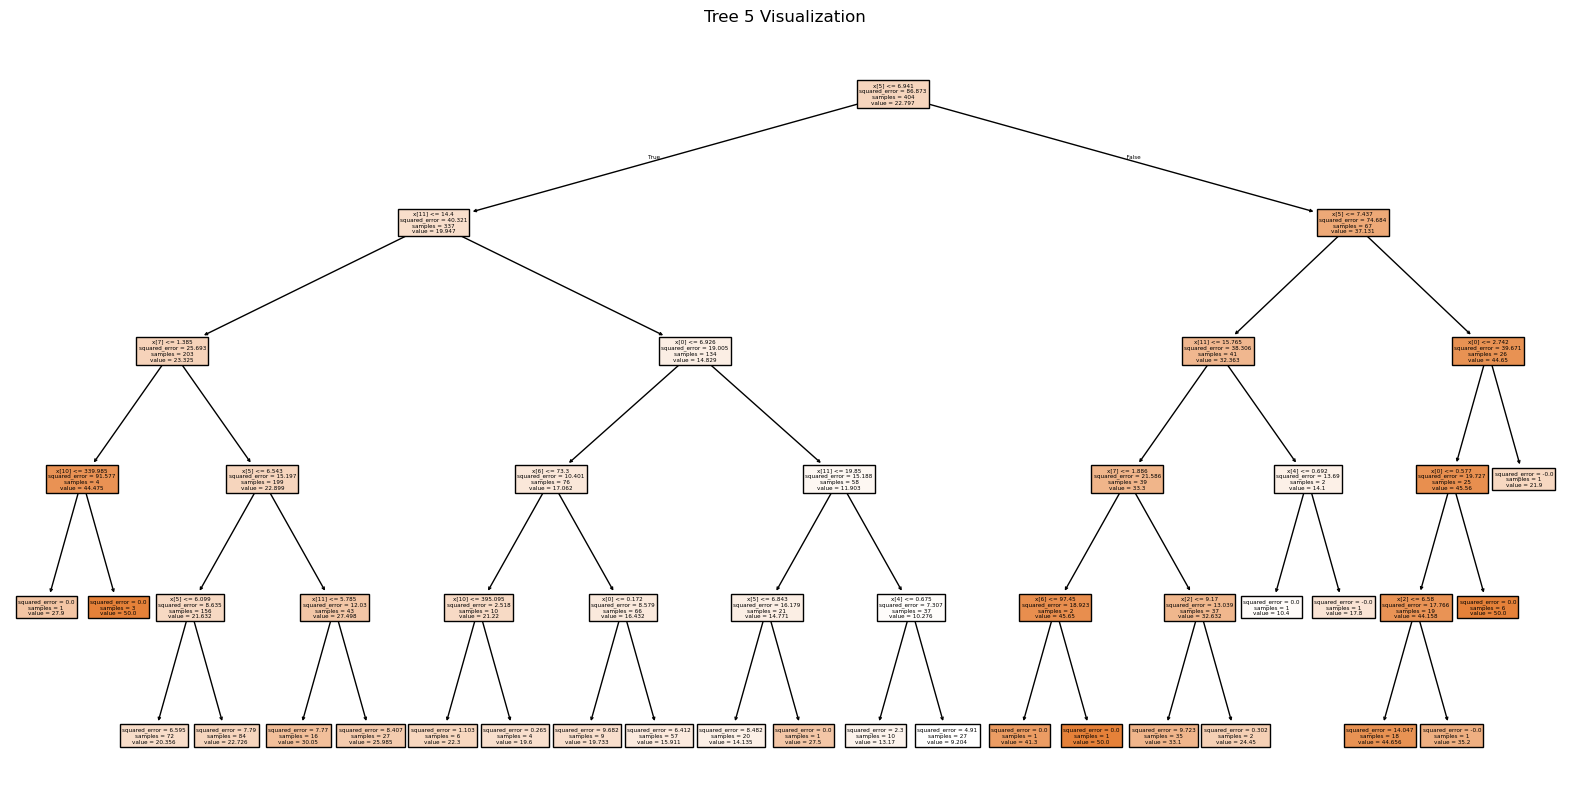

Tree 6 feature importances:
[5.22009741e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.73499974e-03 6.29222250e-01 6.17612617e-03 7.27222195e-02
 0.00000000e+00 0.00000000e+00 5.42729365e-04 2.27382135e-01]
Tree 6 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_11 <= 10.51
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  10.51
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- featu

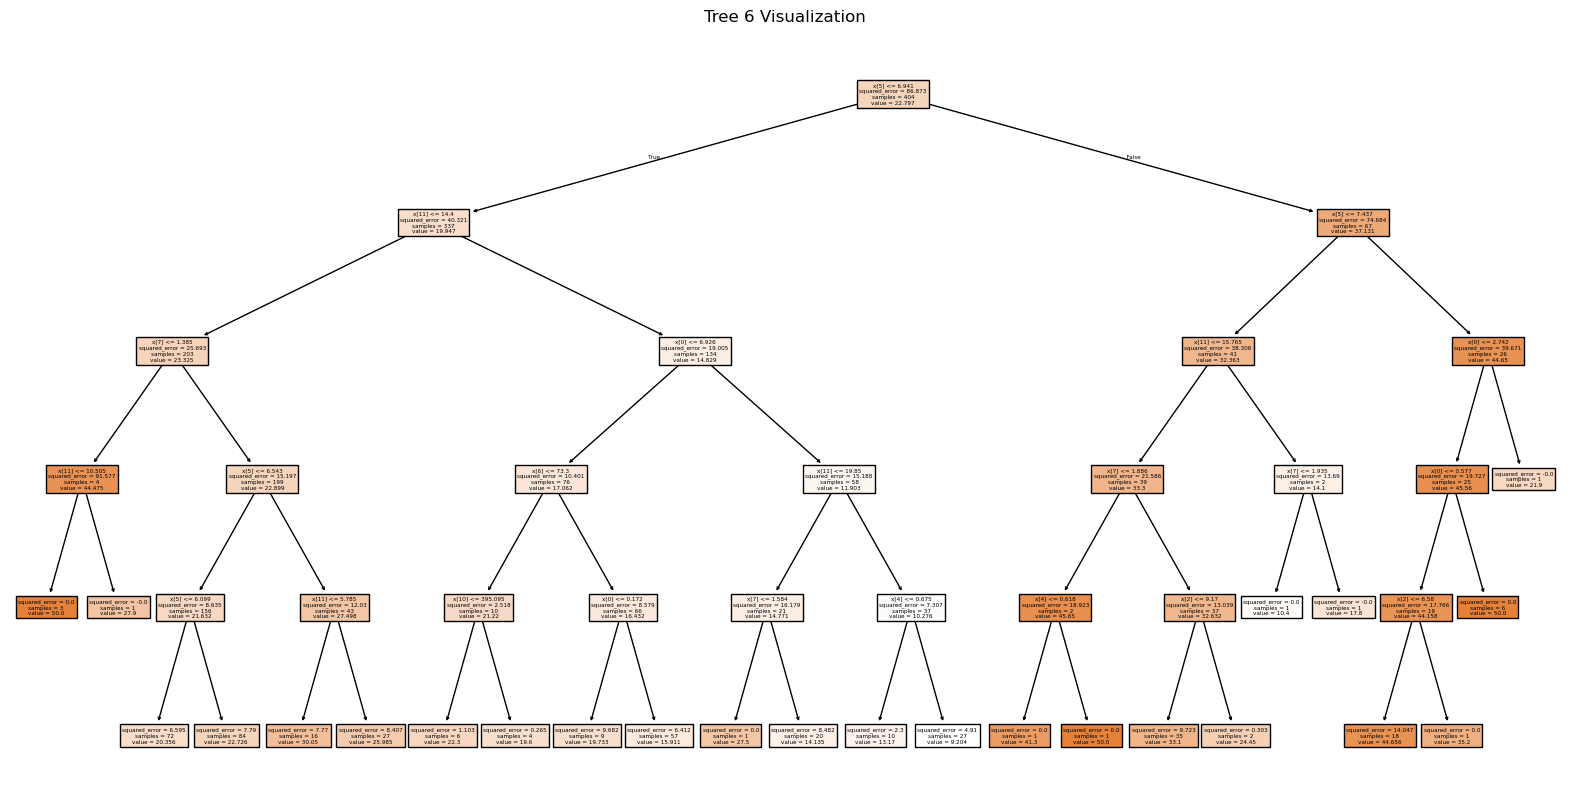

Tree 7 feature importances:
[0.05725882 0.         0.00701857 0.         0.00356104 0.6532197
 0.00617613 0.06659581 0.         0.         0.01190566 0.19426427]
Tree 7 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_10 <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature_10 <= 395.10
|   |   |   |   |   |--- value: 

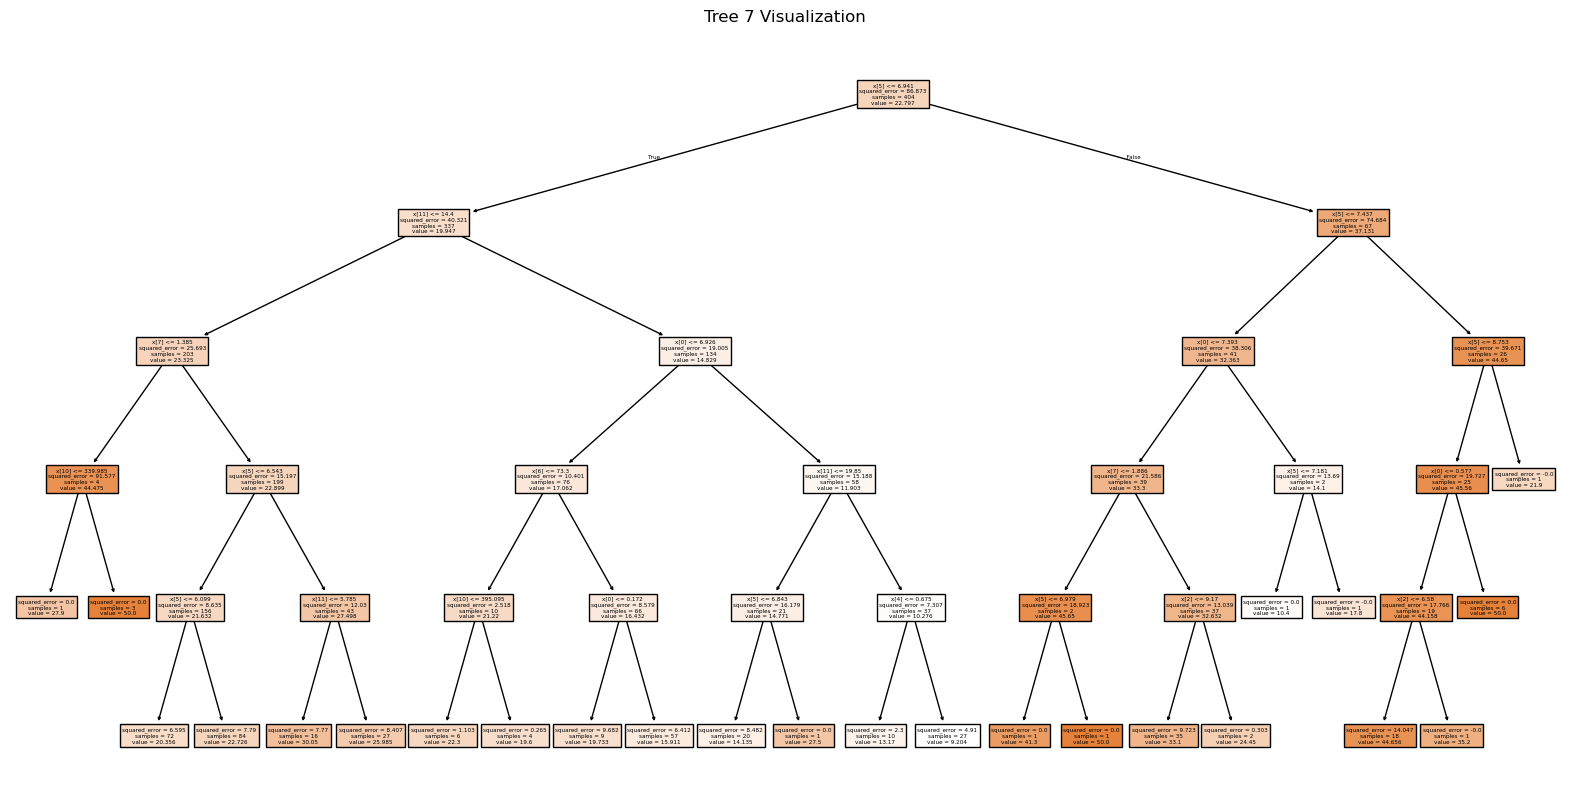

Tree 8 feature importances:
[0.03550389 0.         0.00701857 0.         0.00356104 0.62922225
 0.00702546 0.07187289 0.01669709 0.         0.01190566 0.21719316]
Tree 8 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_10 <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature_10 <= 395.10
|   |   |   |   |   |--- value:

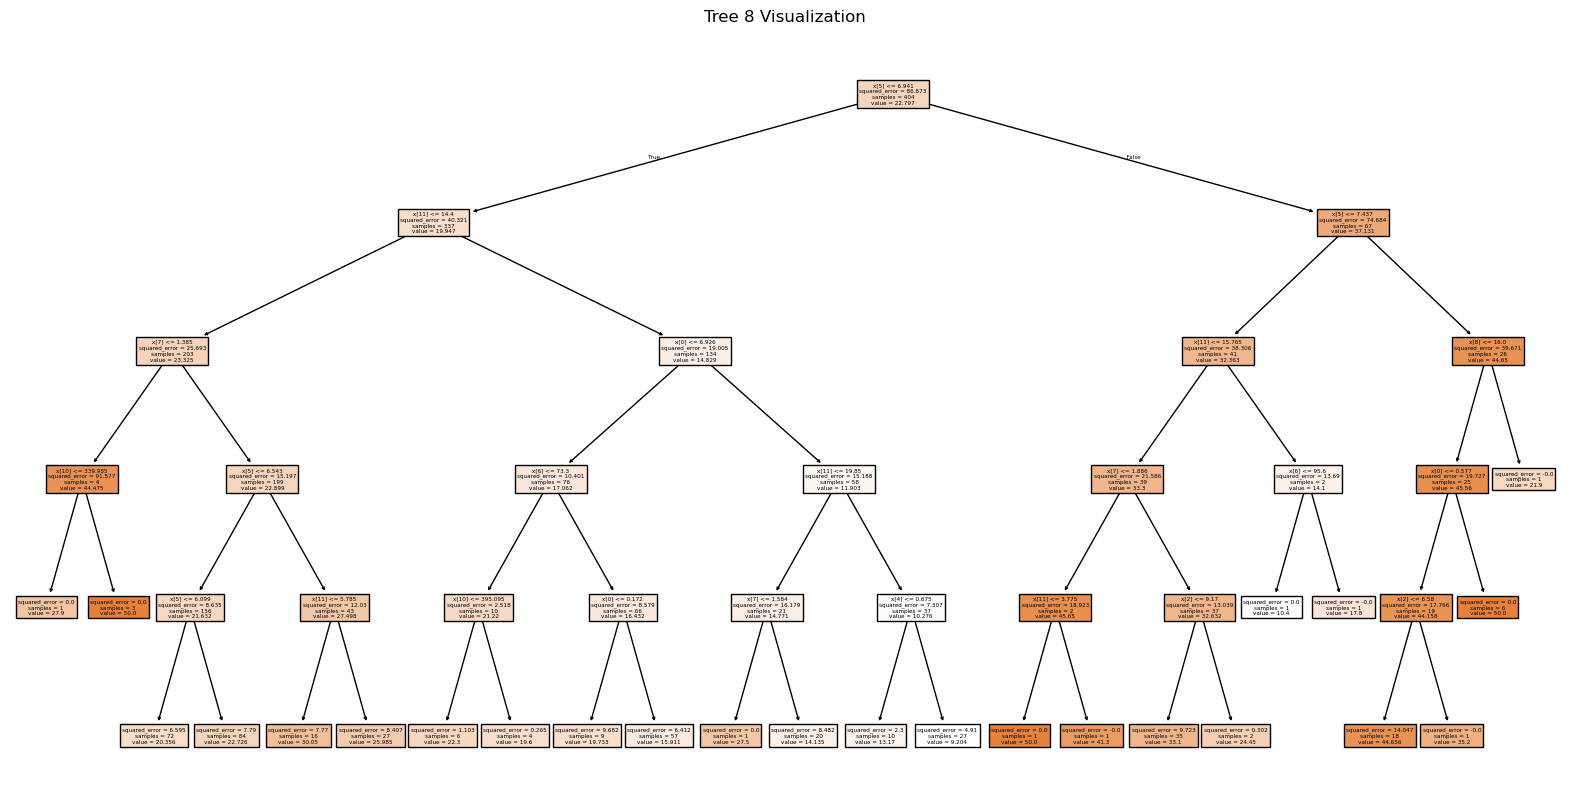

Tree 9 feature importances:
[3.55038879e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 2.61653065e-02 6.34499324e-01 6.17612617e-03 6.65958126e-02
 1.66970863e-02 1.17395935e-03 5.42729365e-04 2.05627202e-01]
Tree 9 structure:
|--- feature_5 <= 6.94
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_11 <= 10.51
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  10.51
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_11 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- featu

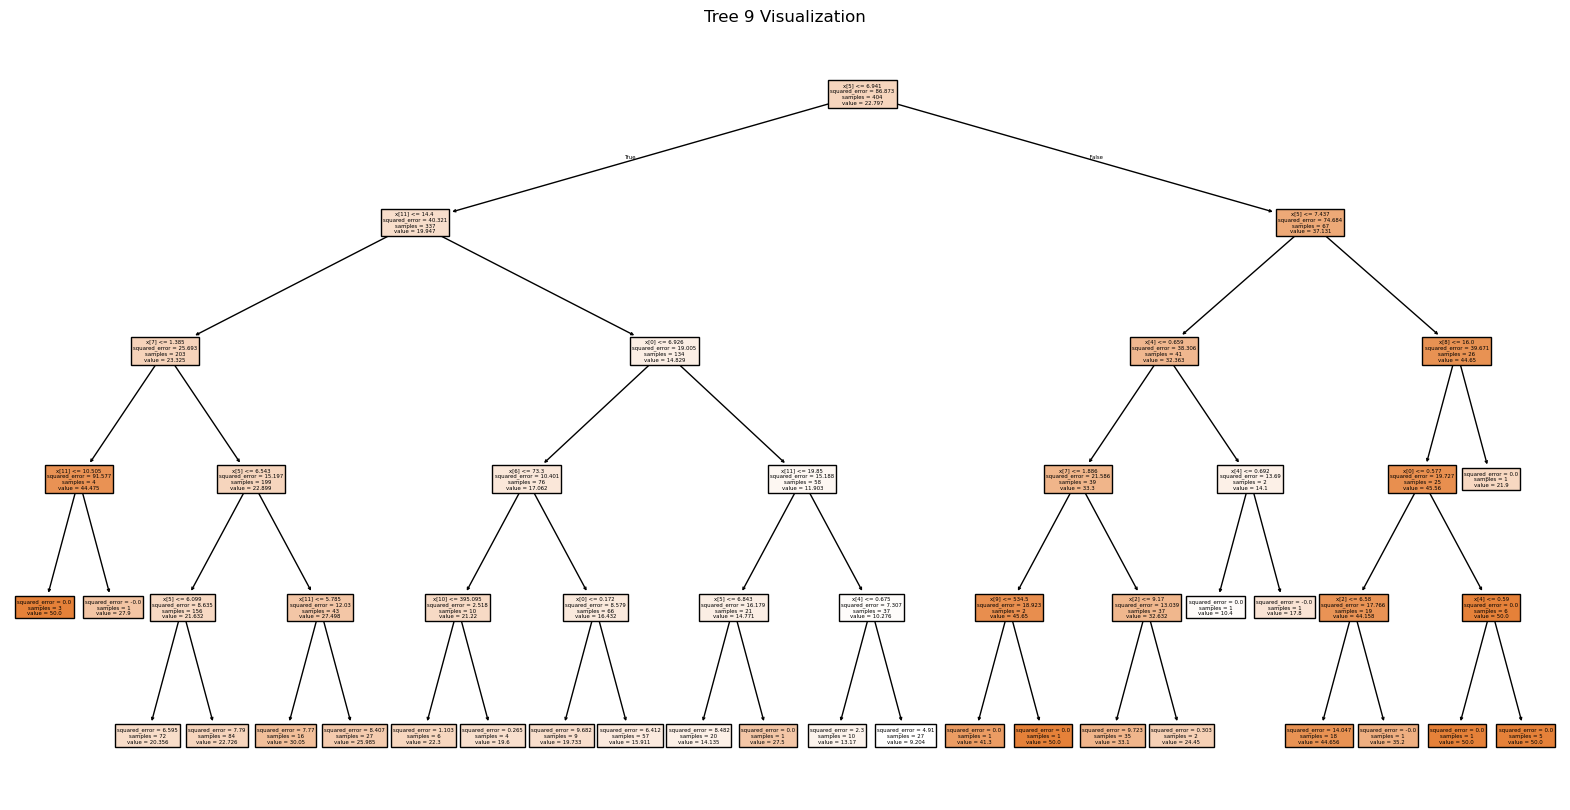

In [28]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()